In this notebook we check whether T1236C, T2677G and T3435C are in positions of conserved low/high MFE (and therefore perhaps affect co-translational folding). We plot the results. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils_MDR1 import variant_info, colors

## Functions

In [3]:
''' 
Takes the df that contains the z-score per each cds position in the MDR1 gene, and add two 
boolian columns that indicate whether the position is a position with significantly low or high z-score. 

Positions with significantly low[high] z-scores are positions that -
1. Have a negative[positive] z-score. 
2. Have a p-value smaller than 0.1. 
3. Are in valid positions ("good_position" == True) 
'''
def get_significant_positions(zscores_df: pd.DataFrame) -> pd.DataFrame:
    
    low_z = zscores_df["z-score"] < 0 #z-scores that are below the mean
    high_z = zscores_df["z-score"] > 0 #z-scores that are below the mean
    low_p = zscores_df["corrected p-value"] < 0.1 #z-scores with a p-value lower than 0.1 (could be high or low z-scores)
    good_pos = zscores_df["good_position"] == True #only z-scores at valid positions
    
    zscores_df["significantly_low_mfe"] = low_z & low_p & good_pos
    zscores_df["significantly_high_mfe"] = high_z & low_p & good_pos
    
    return(zscores_df)

In [4]:
''' Plot the MFE profile of the MDR1 gene around a specific position. Also show conserved low MFE and high MFE regions '''

def plot(variant_name:str, cds_pos: int, mfe_scores_original: np.array, low_positions: np.array, high_positions: np.array) -> None:
    
    num_positions = mfe_scores_original.shape[0] #total number of positions in the CDS
    
    profile, = plt.plot(np.arange(num_positions), mfe_scores_original, c = "grey") #plot the MFE profile
    vertic = plt.axvline(x = cds_pos, color = "royalblue") #plot a vertical line at the interesting position

    # plot vertical lines where we have significantly conserved low/high MFE
    ymin, ymax = plt.ylim()
    for xi in low_positions:
        plt.vlines(xi, ymin, ymax, colors=colors[3], label = None)  # Draw a vertical line at each data point's x-coordinate
    for xi in high_positions:
        plt.vlines(xi, ymin, ymax, colors=colors[6], label = None)  

    proxy1 = plt.Line2D([0], [0], linestyle='none', color=colors[3], marker='_', markersize = 10)
    proxy2 = plt.Line2D([0], [0], linestyle='none', color=colors[6], marker='_', markersize = 10)

    plt.legend([profile, vertic, proxy1, proxy2],["Mean across orthologs", "Position of variant", 
                                                  "Conserved low MFE","Conserved high MFE"], framealpha=0.5,
               prop={'size': 12}, loc = "lower left")

    plt.xlim([cds_pos - 100, cds_pos + 100])
    
    plt.title(f"{variant_name}", size = 15)

    plt.xlabel("CDS position [nt]", size = 15)
    plt.ylabel("MFE [kcal/mol]", size = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylim([ymin + 1, ymax - 1])
    
    plt.savefig(f'../Figures/co_trans/{variant_name}_co_trans_new.png', bbox_inches = "tight", dpi=500)




## Main

In [6]:
gene = "ENSG00000085563" #MDR1

In [7]:
''' Get the mfe profiles of the original MDR1 gene and the permutations '''
original = pd.read_pickle(f"../Results/mfe/mfe_scores/original/{gene}.pickle.gz")
# column = pd.read_pickle(f"../Results/mfe/mfe_scores/column/{gene}.pickle.gz").mean(axis = 0)
# vertical = pd.read_pickle(f"../Results/mfe/mfe_scores/vertical/{gene}.pickle.gz").mean(axis = 0)


In [8]:
''' Get the positions with the significantly low/high z-scores '''

#z-scores of all MDR1 cds positions
z_scores_vertical = pd.read_pickle(f"../Results/mfe/z_scores/{gene}_vertical.pickle")
z_scores_column = pd.read_pickle(f"../Results/mfe/z_scores/{gene}_column.pickle")

#add to each df two boolian columns indicating wether the position has significantly (p<0.1) low or high mfe
z_scores_vertical = get_significant_positions(z_scores_vertical)
z_scores_column = get_significant_positions(z_scores_column)

#get the positions for which there is concensus among vertical and column methods
low_mfe = (z_scores_vertical["significantly_low_mfe"] & z_scores_column["significantly_low_mfe"]).replace({True: 1, False: 0})
high_mfe = (z_scores_vertical["significantly_high_mfe"] & z_scores_column["significantly_high_mfe"]).replace({True: 1, False: 0})

low_positions = np.where(low_mfe == 1)[0] #the CDS positions with significantly low z-scores
high_positions = np.where(high_mfe == 1)[0]#the CDS positions with significantly high z-scores



### T1236C

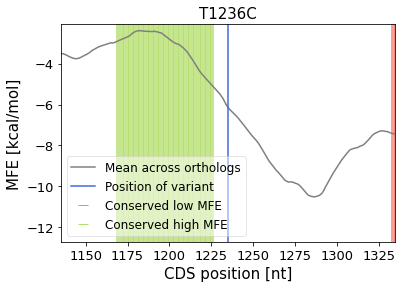

In [13]:
variant_name = variant_info[1]["variant_name"] 
cds_pos = variant_info[1]["cds_position"] - 1 #0-based
plot(variant_name, cds_pos, original, low_positions, high_positions, z_scores_vertical, z_scores_column)


### T2677G

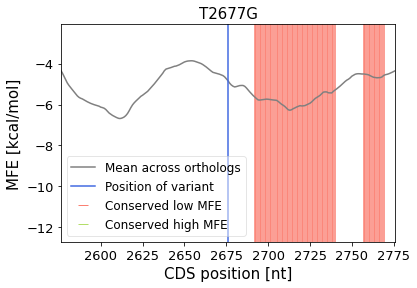

In [14]:
variant_name = variant_info[2]["variant_name"] 
cds_pos = variant_info[2]["cds_position"] - 1 #0-based
plot(variant_name, cds_pos, original, low_positions, high_positions, z_scores_vertical, z_scores_column)


### T3435C

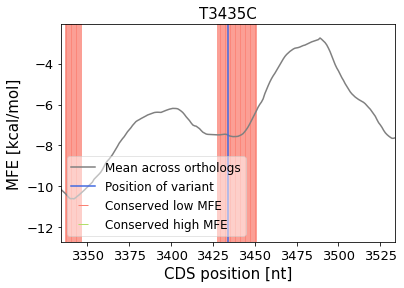

In [15]:
variant_name = variant_info[3]["variant_name"] 
cds_pos = variant_info[3]["cds_position"] - 1 #0-based
plot(variant_name, cds_pos, original, low_positions, high_positions, z_scores_vertical, z_scores_column)
